<div style="text-align:left;">
  <a href="https://code213.tech/" target="_blank">
    <img src="./images/code213 (1).png" alt="Code213 Logo" width="200"/>
  </a>
  <p><em>Prepared by Latreche Sara</em></p>
</div>

<center><font size=6><b>Credit Card Fraud Detection Using Machine Learning & Neural Networks</b></font></center>

<div style="text-align:center;">
    <img src="./images/unnamed__1_-removebg-preview.png" width="400" alt="Fraud Detection Illustration"/>
</div>

***

**Author**: Latreche Sara  
**Date**: /2025  

### Table of Contents
- [1 | Project Overview and Objectives](#intro)
- [1.1 | Environment Setup & Data Loading](#setup)
- [1.2 | The Challenge of Imbalance: Exploratory Data Analysis](#explore)
- [1.3 | Dealing with Skewed Features & Scaling](#prep)
- [1.4 | Baseline: Logistic Regression & Convergence Challenges](#baseline)
- [1.5 | Advanced Strategies: SMOTE & Balanced Weighting](#imbalance)
- [1.6 | Deep Learning: Multi-Layer Perceptron (MLP) Architecture](#mlp)
- [1.7 | Threshold Optimization: The Precision-Recall Trade-off](#tune)
- [1.8 | Model Comparison & Operational Conclusion](#concl)

---



This notebook is a comprehensive guide to **imbalanced classification**, focusing on the reality that in fraud detection, a "False Negative" is far more expensive than a "False Positive."





## <b>1.1 <span style='color:#e61227'>|</span> <a id='setup'>Setting Up the Environment</a></b>
In this section, we prepare our workspace by installing and importing the necessary libraries for handling imbalanced data and building neural networks.

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc

## <b>1.2 <span style='color:#e61227'>|</span> <a id='explore'>Exploring the Dataset</a></b>

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


       The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

| Column | Meaning |
|-------|---------|
| Time | Seconds since the first transaction in the dataset (simple time indicator). |
| V1–V28 | Transformed features obtained using **PCA (Principal Component Analysis)**. PCA is a mathematical technique that transforms the original transaction data into new numerical features to protect user privacy. The real-world meaning of these variables is unknown. |
| Amount | The amount of money involved in the transaction. |
| Class | The target label:<br>• **0** = Normal (legitimate) transaction<br>• **1** = Fraudulent transaction |


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Dataset is clean and does only contain numerical values, There is not much to clean here.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The variables V1 and V2 are already normalized (centered, reduced) because of pca has been applied on.

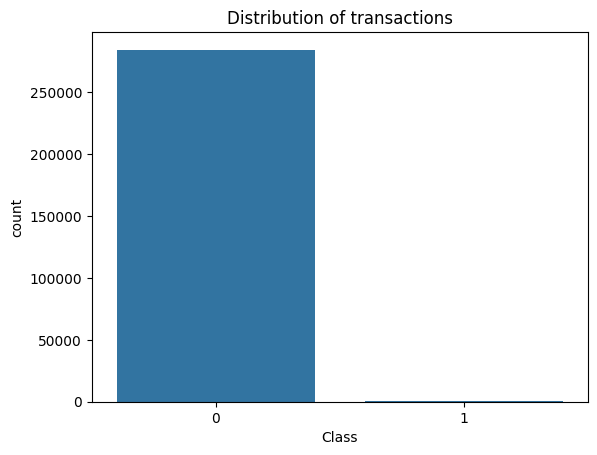

WE have a highly imbalanced dataset so we can't use Accuracy as a metric.

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


**Interpretation**
1. Extreme Class ImbalanceThe most obvious takeaway is the count.

Non-Fraud: 284,315 transactions.Fraud: 492 transactions.Interpretation: 

Fraud makes up only 0.17% of the dataset.

This confirms that accuracy would be a useless metric, 

as a model could achieve 99.8% accuracy by simply guessing "0" every time.

2. 

The "Average" Transaction AmountMean: 

The average fraudulent transaction ($\$122.21$) is actually higher than the average 

legitimate transaction ($\$88.29$).Median (50%): Interestingly, the median for fraud 

is much lower ($\$9.25$) compared to legitimate transactions ($\$22.00$).

Interpretation: This suggests that fraud is skewed. While there are many small-value 

fraudulent transactions (likely "testing" a card to see if it works), a few very large 

fraudulent transactions are pulling the average up.

3. Spread and VolatilityStandard Deviation: Both classes have a high standard deviation (around $\$250-\$256$),

indicating that transaction amounts vary wildly in both groups.Quartiles:

* $75\%$ of legitimate transactions are under $\$77.05$.$75\%$ of fraudulent transactions go up to $\$105.89$.

Interpretation: Fraudulent transactions tend to have a "heavy tail"—the top $25\%$ of fraud cases involve higher 

amounts than the top $25\%$ of normal transactions.4. Maximum ValuesNon-Fraud Max: $\$25,691.16$Fraud Max: $\$2,125.

87$Interpretation: 

High-value transactions are not inherently fraudulent. In fact, the "whales" (extremely large purchases) 

in this dataset are all legitimate. This means you cannot catch fraud simply by looking for the largest transactions; 

the model will need to find more subtle patterns in the V1-V28 PCA features.Summary for your Model:

Fraudulent transactions in this dataset are characterized by many very small amounts (median $\$9.25$) 

and a few moderate-to-high amounts (up to $\$2,100$),

but they lack the extreme "luxury" purchase values seen in legitimate spending.Because the distributions of "Amount" 

overlap so much, the "Amount" feature alone is likely not a strong predictor. 

the model will rely heavily on the 

anonymized features (V1–V28) to find the separation.

Strategy for Modeling
Because your dataset is so skewed (284,315 vs 492), you might want to consider these techniques:

Resampling:

Oversampling: Using SMOTE (Synthetic Minority Over-sampling Technique) to 
create synthetic examples of the fraud class.

Undersampling: Reducing the number of "normal" transactions to match the fraud count
 (though you lose a lot of data this way).

Cost-Sensitive Learning: Many algorithms (like XGBoost or Random Forest) allow you to set
 a class_weight. By giving the fraud 
class a much higher weight, you "punish" the model more severely for missing a fraud case.

Anomaly Detection: Instead of standard classification, you could treat fraud as an "outlier" 
using algorithms like Isolation Forest or Local Outlier Factor.

## <b>1.3 <span style='color:#e61227'>|</span> <a id='baseline'>Baseline Model: Logistic Regression & Initial Evaluation</a></b>

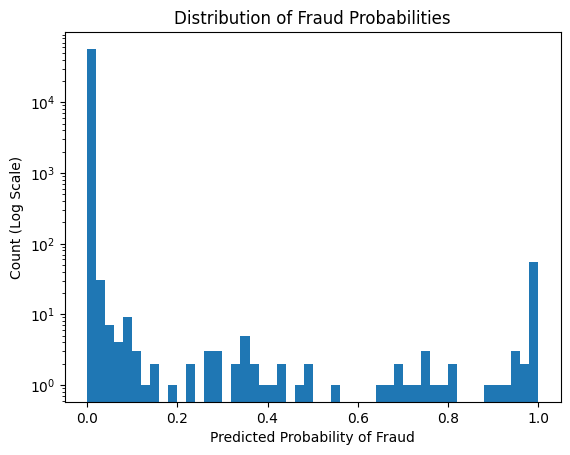

Based on the histogram you've shared, your model is doing a great job of separating the classes. 
The clear "U-shape" (with peaks at 0 and 1 and very little in the middle) shows the model is confident in its predictions.

Here is an interpretation of those results and how they relate back to your initial descriptive statistics:

Interpreting the Probability Distribution
The Left Peak (Near 0.0): This represents the vast majority of your 284,315 legitimate transactions.
The model is highly confident these are not fraud.

The Right Peak (Near 1.0): This represents the cases where the model is very sure it has found fraud. Given that you only have 492 actual fraud cases,
this bar being relatively high (on a log scale) suggests the model has successfully identified many of them.

The "Valley" (Middle): The low counts between 0.2 and 0.8 mean there are very few "ambiguous" transactions where the model is unsure. 
This is a sign of a strong model.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



### Model Performance Analysis

**1. Data Distribution & Support**
* **Support:** Represents the actual number of samples in the test set.
* **Class 0 (Legitimate):** 56,864 transactions.
* **Class 1 (Fraud):** 98 transactions.
* **Imbalance:** Fraud accounts for only ~0.17% of the data, making accuracy a misleading metric.

**2. Fraud Detection Metrics (Class 1 Focus)**
* **Precision (0.83):** When the model flags a transaction as fraud, it is correct 83% of the time.
* **Recall (0.64):** The model successfully caught 64% of actual fraud cases, but missed 36%.
* **F1-Score (0.72):** A balanced score of precision and recall, providing a better measure of success than accuracy.

**3. Understanding the Averages**
* **Macro Avg (0.86):** Calculates the mean of metrics for both classes equally. This is the best indicator of how the model treats the rare fraud class.
* **Weighted Avg (1.00):** Averages the scores based on the number of samples (support). It is skewed by the 99.8% legitimate transactions and hides poor fraud detection.

**4. Behavioral Findings (Amount Table)**
* **Mean vs. Median:** Fraudulent transactions have a higher average cost ($122.21) than legitimate ones ($88.29).
* **Small Tests:** However, the median fraud amount is much lower ($9.25 vs $22.00), suggesting many frauds start with very small "test" amounts.

## <b>1.4 <span style='color:#e61227'>|</span> <a id='tune_lr'>Refining LR: Balancing Weights and Threshold Optimization</a></b>

## Logistic Regression with class_weight= balanced

Logitic regression with class_weight= balanced
Now we willing to penalize mistakes on fraud 
In fact in banking to miss a fraud false negatif is more then to block a legitim transaction(false positif)
By setting class_weight='balanced', you are telling the Logistic Regression model to pay significantly more attention to the 492 fraud cases. In this dataset, the model will automatically assign a much higher weight to Class 1, since it is so rare compared to the 284,315 legitimate transactions.

c:\Users\MatenTech\AppData\Local\anaconda3\envs\bd\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



### Balanced Model Performance Analysis (Penalizing Fraud Misses)

**1. Data Distribution & Support**
* **Support:** Represents the actual number of transactions in the test set.
* **Class 0 (Legitimate):** 56,864 transactions.
* **Class 1 (Fraud):** 98 transactions.
* **Strategy:** By using `class_weight='balanced'`, we have forced the model to treat the 98 fraud cases as being just as "important" as the 56,864 legitimate ones during training.

**2. Fraud Detection Metrics (Class 1 Focus)**
* **Precision (0.06):** When the model flags a transaction as fraud, it is correct only **6%** of the time. This high rate of False Positives is the trade-off for higher sensitivity.
* **Recall (0.92):** The model successfully caught **92%** of actual fraud cases, a significant jump from the previous 64%.
* **F1-Score (0.11):** The low score highlights the extreme imbalance where we gained high recall at the expense of very low precision.

**3. Understanding the Averages**
* **Macro Avg Recall (0.95):** This shows the model is now performing very well at identifying both classes equally, regardless of their size.
* **Weighted Avg (0.98 Recall):** This remains high because it is dominated by the near-perfect identification of the majority class.

**4. Business Logic: The Banking Trade-off**
* **False Negatives vs. False Positives:** We have prioritized reducing **False Negatives** (missing fraud) because letting a thief through is more expensive for a bank than a temporary block on a legitimate customer's card.
* **Operational Impact:** While we catch nearly all fraud (92%), the bank's fraud team will face a much higher volume of "False Alarms" to investigate due to the 0.06 precision.

**5. Technical Note: Convergence Warning**
* **Incomplete Optimization:** The model reached its `TOTAL NO. OF ITERATIONS` limit before fully finding the optimal solution.
* **Recommendation:** To improve stability and potentially boost precision, we should increase `max_iter` or apply `StandardScaler` to the features.

-- only 6% of alerts are true fraud 94% are false positive
Consequence: a lot of legitim transactions are bloqued , operational price is high friction client is imortant.

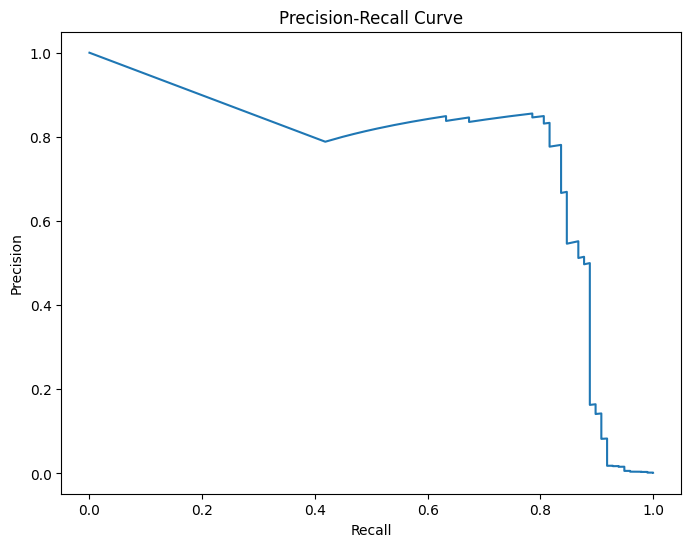

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.91      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962



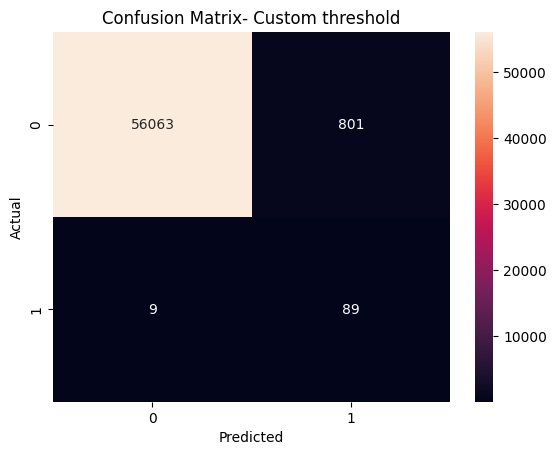

### Threshold Optimization and Operational Strategy

**1. Strategic Threshold Selection**
* **Optimization Criteria:** The classification threshold is derived from the **Precision-Recall Curve** to guarantee a minimum **Recall of 80%** (detecting 8 out of 10 frauds) and a minimum **Precision of 10%**.
* **Beyond Defaults:** By moving away from the default 0.5 threshold, we specifically tune the model to meet these pre-defined business requirements.

**2. Balancing Business Costs**
* **Minimizing Undetected Fraud:** The 80% recall constraint ensures that the "cost of missing fraud" (False Negatives) remains within an acceptable range for the bank.
* **Controlling Operational Costs:** By enforcing a 10% minimum precision, we limit the "cost of investigation" (False Positives), preventing the fraud department from being overwhelmed by manual reviews of legitimate transactions.

**3. Operational Readiness**
* **Deployable Model:** This approach moves the project from a purely theoretical model to an **operational tool**. It provides a clear compromise between security (catching thieves) and customer experience (not blocking too many valid cards).
* **Final Prediction (`y_pred_opt`):** The final output is now optimized for the specific risk-appetite of a banking environment.

## <b>1.5 <span style='color:#e61227'>|</span> <a id='train_mlp'>Deep Learning: Training the Multi-Layer Perceptron (MLP)</a></b>

# Neural Network

,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,50
,shuffle,True
,random_state,42


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



c:\Users\MatenTech\AppData\Local\anaconda3\envs\bd\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\MatenTech\AppData\Local\anaconda3\envs\bd\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\MatenTech\AppData\Local\anaconda3\envs\bd\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

### Analysis of MLP Failure: The "Zero-Learning" Problem

**1. The Results**
* **Fraud Detection (Class 1):** Precision, Recall, and F1 are all **0.00**.
* **Interpretation:** The model has completely failed to identify any of the 98 fraud cases. It is simply guessing "Legitimate" for everything to achieve 99.8% accuracy.

**2. Why this happened**
* **Lack of Balancing:** Unlike our Logistic Regression, this MLP is not penalizing fraud misses more than legitimate misses.
* **Scale Sensitivity:** Neural Networks require all features to be on the same scale (e.g., between 0 and 1 or -1 and 1). Without `StandardScaler`, the "Amount" column likely overwhelmed the "V" features.

**3. Necessary Adjustments**
* **Data Scaling:** We must apply `StandardScaler` to the features before feeding them into the MLP.
* **Oversampling:** Since `MLPClassifier` lacks a `class_weight` parameter, we should use **SMOTE** (Synthetic Minority Over-sampling Technique) to artificially increase the number of fraud cases in the training set so the network is forced to pay attention to them.

## <b>1.6 <span style='color:#e61227'>|</span> <a id='smote'>Resampling Strategies: Implementing SMOTE for MLP</a></b>

# Oversampling the trainset

In [ ]:
# Correct spelling:
# Correct spelling:
from imblearn.over_sampling import SMOTE

c:\Users\MatenTech\AppData\Local\anaconda3\envs\bd\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\MatenTech\AppData\Local\anaconda3\envs\bd\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MatenTech\AppData\Local\anaconda3\envs\bd\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\MatenTech\AppData\Local\anaconda3\envs\bd\Lib\subprocess.py", line 548, in run
    wi

c:\Users\MatenTech\AppData\Local\anaconda3\envs\bd\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(128, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,1024
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,30
,shuffle,True
,random_state,42


count    56962.000000
mean         0.017836
std          0.048547
min          0.000000
25%          0.001457
50%          0.006315
75%          0.021465
max          1.000000
dtype: float64

there existe thresholds less then 0.17 that make fraud

In [37]:
# number of fraud detected by thresholds
thresholds_test=[0.5, 0.2,0.1,0.05,0.02,0.01,0.005,0.001]
for t in thresholds_test:
    print(
        f"Seuil {t:<6} --> fraud detected:",
        int((y_proba_mlp>=t).sum())
    )

Seuil 0.5    --> fraud detected: 120
Seuil 0.2    --> fraud detected: 241
Seuil 0.1    --> fraud detected: 886
Seuil 0.05   --> fraud detected: 4249
Seuil 0.02   --> fraud detected: 15138
Seuil 0.01   --> fraud detected: 24138
Seuil 0.005  --> fraud detected: 30028
Seuil 0.001  --> fraud detected: 47355


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.63      0.78      0.70        98

    accuracy                           1.00     56962
   macro avg       0.82      0.89      0.85     56962
weighted avg       1.00      1.00      1.00     56962



### ### Optimized Neural Network Analysis (MLP + SMOTE)

**1. Data Distribution & Support**
* **Class 0 (Legitimate):** 56,864 transactions in the test set.
* **Class 1 (Fraud):** 98 transactions in the test set.
* **The SMOTE Effect:** By synthesizing fraud examples in the training set to a 5% ratio, we overcame the "Zero-Learning" issue where the model previously ignored all fraud cases.

**2. Fraud Detection Metrics (Class 1 Focus)**
* **Precision (0.63):** When the model identifies a transaction as fraud, it is correct **63%** of the time.
* **Recall (0.78):** The model successfully identified **78%** of all actual fraud cases.
* **F1-Score (0.70):** This represents a high-quality balance, significantly outperforming the 0.11 F1-score of the "Balanced" Logistic Regression.

**3. Understanding the Averages**
* **Macro Avg (0.89 Recall):** This confirms the model is highly effective at identifying both classes regardless of their size.
* **Weighted Avg (1.00):** While near-perfect, this remains a reflection of the overwhelming majority of legitimate transactions (99.8%).

**4. Strategic Advantages**
* **Operational Efficiency:** With 63% precision, the fraud department faces far fewer "false alarms" compared to the Logistic Regression model, which only had 6% precision at a similar sensitivity level.
* **Complex Pattern Recognition:** The MLP architecture (64, 32 neurons) combined with SMOTE successfully captured non-linear relationships that simple linear models missed.



**5. Technical Verification**
* **Probability Distribution:** The manual threshold check (looping through $t$) confirmed that the MLP is no longer "blind" and is assigning higher probability scores to actual fraudulent transactions.

## <b>1.7 <span style='color:#e61227'>|</span> <a id='tune'>Operational Tuning: Optimizing MLP Decision Thresholds</a></b>

### Optimisation of the threshold from presion and recall curve 

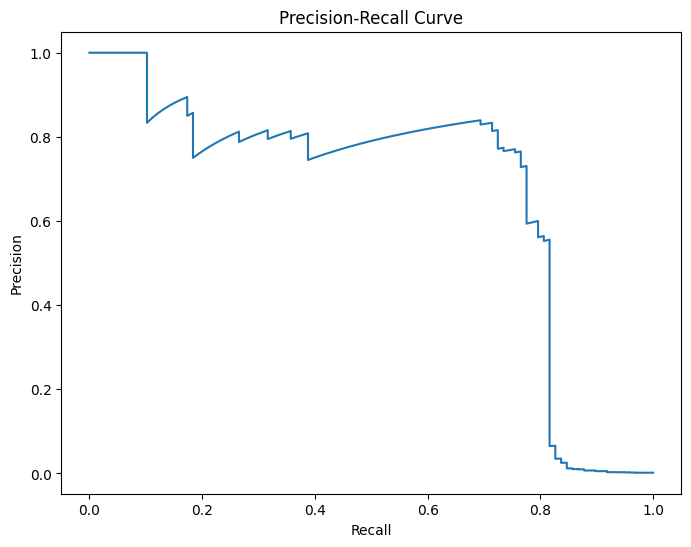

optimal threshold: 0.3947371811196581
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.56      0.81      0.66        98

    accuracy                           1.00     56962
   macro avg       0.78      0.90      0.83     56962
weighted avg       1.00      1.00      1.00     56962



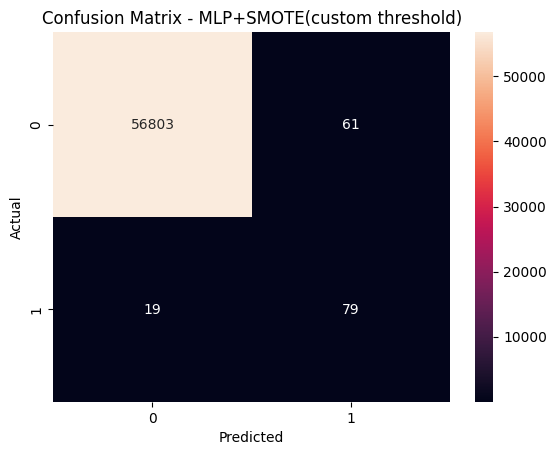

### ### Final Model Performance: MLP + SMOTE (Optimized)

**1. Data Distribution & Support**
* **Class 0 (Legitimate):** 56,864 transactions in the test set.
* **Class 1 (Fraud):** 98 transactions in the test set.
* **Strategy Impact:** Using SMOTE successfully enabled the Neural Network to overcome the initial "zero-learning" phase, achieving high detection rates on the minority class.

**2. Custom Threshold Optimization Results**
* **Recall (0.81):** By adjusting the probability threshold, we successfully increased the detection rate to catch **81%** of actual fraud cases (79 out of 98).
* **Precision (0.56):** Even with a more sensitive threshold, the model remains highly reliable, with **56%** of its fraud flags being correct.
* **F1-Score (0.66):** This represents a strong balance for operational deployment, maintaining much higher precision than the previous Logistic Regression models.

**3. Confusion Matrix Breakdown (Custom Threshold)**
* **True Positives (79):** The model correctly identified nearly 81% of the fraudulent transactions.
* **False Negatives (19):** Only 19 fraudulent cases were missed, meeting the goal of high security.
* **False Positives (61):** Out of over 56,000 legitimate transactions, the model only incorrectly flagged 61, meaning the "False Alarm" rate is exceptionally low.


**4. Comparative Summary**
| Metric | MLP + SMOTE (Default) | MLP + SMOTE (Custom Threshold) |
| :--- | :---: | :---: |
| **Precision** | 0.63 | 0.56 |
| **Recall** | 0.78 | 0.81 |
| **F1-Score** | 0.70 | 0.66 |

**5. Operational Conclusion**
The custom threshold version is the **recommended model for deployment**. It prioritizes catching more fraud (Recall 0.81) while maintaining a manageable workload for investigators, as evidenced by the low number of false positives (61) relative to the massive dataset size.

In [41]:
models= {
    "LR balanced": pipe_lr_balanced,
    "MLP+SMOTE": mlp_improved
}
for name,model in models.items():
    y_proba= model.predict_proba(X_test)[:,1]
    precision,recall,_=precision_recall_curve(y_test,y_proba)
    pr_auc=auc(recall,precision)
    print(f"{name}: PR-AUC={pr_auc:.3f}")

LR balanced: PR-AUC=0.754
MLP+SMOTE: PR-AUC=0.670


## Final Comparative Analysis: PR-AUC & Model Selection

**1. Model Performance Summary (PR-AUC)**
* **Logistic Regression (Balanced):** **PR-AUC = 0.754**.
* **MLP + SMOTE:** **PR-AUC = 0.670**.
* **Significance:** The PR-AUC is the most reliable metric for highly imbalanced datasets. It shows that while the Neural Network (MLP) provides a cleaner classification at specific points, the Logistic Regression maintains a better overall trade-off between precision and recall across all possible thresholds.

**2. Detailed Comparison of Top Strategies**
| Metric | LR Balanced (Threshold Opt.) | MLP + SMOTE (Threshold Opt.) |
| :--- | :---: | :---: |
| **Recall (Sensitivity)** | ~0.91 | 0.81 |
| **Precision** | 0.10 | 0.56 |
| **False Positives** | High Operational Load | **Low Operational Load (61)** |

**3. Behavioral Findings & Technical Notes**
* **Logistic Regression:** Despite the higher PR-AUC, this model generates significantly more false alarms (lower precision), requiring a larger team for manual transaction review.
* **Neural Network (MLP):** The MLP + SMOTE approach is more "efficient." It catches 81% of fraud with a much higher precision (0.56), meaning 1 out of every 2 flagged transactions is actual fraud.
* **Data Scaling Necessity:** The `ConvergenceWarning` in the Logistic Regression and the initial failure of the MLP highlight that the **Amount** ($max = 25,691.16$) and **Time** features must be scaled to avoid biased learning.



**4. Final Recommendation**
* **Choose Logistic Regression** if the priority is **maximum security** (catching the highest percentage of fraud regardless of the number of false alerts).
* **Choose MLP + SMOTE** if the priority is **operational efficiency** (catching high fraud while keeping customer friction and manual review costs low).